In [1]:
from pandas_datareader import data, wb  
import datetime
from matplotlib import pyplot as plt

import korea_apartment_price

In [2]:
apts = korea_apartment_price.shortcuts.search('동작구 본동', '삼성래미안')
apts

[{'address': '서울특별시 동작구 본동', 'code': 1159010400, 'name': '삼성래미안'}]

In [3]:
sizes = set(korea_apartment_price.db.query(apt_infos=apts, filters=[korea_apartment_price.db.pick_size]))
sizes

{18, 25, 34}

In [4]:
entries = korea_apartment_price.db.query(apt_infos=apts, size_from=17, size_to=18, date_from=20150101)
x1 = []
y1 = []
for e in entries:
    x1.append(datetime.date(year=int(e['year']), month=int(e['month']), day=int(e['date'])))
    y1.append(int(e['price'] / e['size'] * 3.3))
print(x1[0])

2015-01-03


In [5]:
df = data.DataReader("^KS11", "yahoo", datetime.datetime(2015, 1, 1))
x2 = [e.date() for e in df.index]
y2 = df['Close'].to_list()

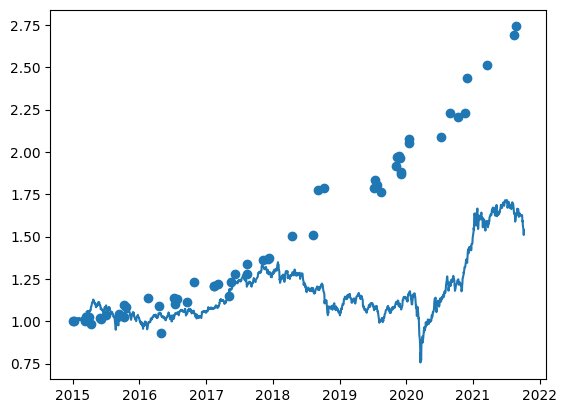

In [6]:
y1 = [v/y1[0] for v in y1]
y2 = [v/y2[0] for v in y2]
plt.figure()
plt.scatter(x1, y1)
plt.plot(x2, y2)
plt.show()